## Import the libraries, load dataset, print shape of data, visualize the images in dataset.

In [ ]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from glob import glob
from matplotlib import pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_path = "/content/gdrive/My Drive/Colab Notebooks/data/plant_seedlings/train.zip"


In [ ]:
!mkdir temp_train

mkdir: cannot create directory ‘temp_train’: File exists


In [ ]:
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall('./temp_train')

In [ ]:
path = "./temp_train/*/*.png"                              # The path to all images in training set. (* means include all folders and files.)
files = glob(path)

trainImg = []                                              # Initialize empty list to store the image data as numbers.
trainLabel = []                                            # Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (70, 70)))  # Get image (with resizing to 128x128)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

In [ ]:
print(trainImg.shape)
print(trainLabel.shape)

(4750, 70, 70, 3)
(4750, 1)


In [ ]:
print(trainImg)

[[[[ 41  48  60]
   [ 48  53  66]
   [ 48  56  71]
   ...
   [ 84 105 122]
   [ 84 108 127]
   [ 51  75  94]]

  [[ 47  49  60]
   [ 52  52  61]
   [ 49  53  67]
   ...
   [ 83 105 124]
   [101 121 135]
   [112 131 140]]

  [[ 48  50  61]
   [ 47  49  56]
   [ 50  53  62]
   ...
   [ 94 118 133]
   [ 99 119 131]
   [104 124 145]]

  ...

  [[ 50  48  55]
   [ 44  43  51]
   [ 46  43  52]
   ...
   [ 58  68  85]
   [ 88 102 116]
   [ 93 110 118]]

  [[ 53  52  59]
   [ 41  38  44]
   [ 49  48  55]
   ...
   [ 27  35  56]
   [ 68  79  89]
   [ 56  69  84]]

  [[ 46  45  51]
   [ 40  39  45]
   [ 51  47  51]
   ...
   [ 30  51  81]
   [ 53  67  98]
   [ 40  51  73]]]


 [[[ 43  48  50]
   [ 41  44  51]
   [ 34  33  35]
   ...
   [ 54  72  91]
   [ 59  82 101]
   [ 76  98 109]]

  [[ 42  48  52]
   [ 42  45  49]
   [ 31  26  37]
   ...
   [ 47  65  87]
   [ 42  64  79]
   [ 64  78  87]]

  [[ 42  48  51]
   [ 42  45  51]
   [ 29  28  31]
   ...
   [ 18  21  43]
   [ 61  72  84]
   [ 75  88

In [ ]:
trainLabel

,0
0,Sugar beet
1,Sugar beet
2,Sugar beet
3,Sugar beet
4,Sugar beet
...,...
4745,Cleavers
4746,Cleavers
4747,Cleavers
4748,Cleavers


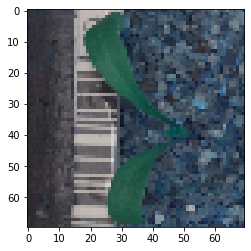

In [ ]:
plt.imshow(trainImg[0])

## Normalization.

In [ ]:
#reducing all pixel intensties to a value between 0 & 1
trainImg = trainImg / 255





## Gaussian Blurring

In [ ]:
trainImg_blurr1 = np.zeros((4750, 70, 70, 3))
trainImg_blurr2 = np.zeros((4750, 70, 70, 3))

for i in range(trainImg.shape[0]): 
  trainImg_blurr1[i] = cv2.GaussianBlur(trainImg[i],(5,5),0)
  trainImg_blurr2[i] = cv2.GaussianBlur(trainImg[i],(15,15),0)



##  Visualize data after pre-processing.


Original Image:



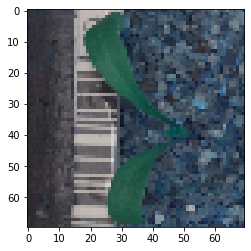

In [ ]:

print('Original Image:\n')
plt.imshow(trainImg[0])



 Output after first gaussian blurring: 



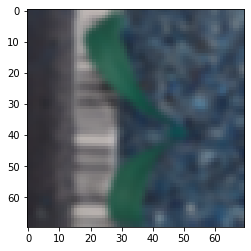

In [ ]:
print('\n Output after first gaussian blurring: \n')
plt.imshow(trainImg_blurr1[0])


 Output after second gaussian blurring: 



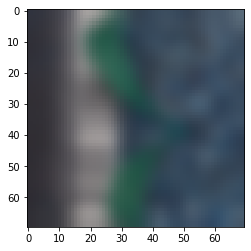

In [ ]:
print('\n Output after second gaussian blurring: \n')
plt.imshow(trainImg_blurr2[0])

## Split the dataset into training, testing, and validation set -  70%,30%,30%

In [ ]:
X = trainImg_blurr1
y= trainLabel

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split( trainImg_blurr1,trainLabel, test_size=0.3, random_state=1)
X_test, X_val,y_test,y_val = train_test_split(X_train,y_train, test_size=0.5, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 70, 70, 3)
(1662, 70, 70, 3)
(1663, 70, 70, 3)
(3325, 1)
(1662, 1)
(1663, 1)


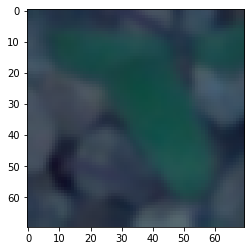

In [ ]:
plt.imshow(X_test[0])

##  Convert labels from digits to one hot vectors

In [ ]:
y_train = pd.get_dummies(y_train)
y_test= pd.get_dummies(y_test)
y_val=pd.get_dummies(y_val)


y_train=np.array(y_train)
y_test=np.array(y_test)
y_val=np.array(y_val)

y_train=y_train.astype('float32')
y_test=y_test.astype('float32')
y_val = y_val.astype('float32')

## print the label for y_train[0]

In [ ]:
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (3325, 12)
One value of y_train: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print("Shape of y_train:", y_test.shape)
print("One value of y_train:", y_test[0])

Shape of y_train: (1662, 12)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## . Reshape data into shapes compatible with Keras models

In [ ]:
# Images resized to 70X70 when files were imported

## Define layers.


In [ ]:
image_size = 70
batch_size = 32

tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.GlobalMaxPool2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(12, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 68, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 34, 34, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       7

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_accuracy',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [ ]:

#model_checkpoint=tf.keras.callbacks.ModelCheckpoint('plant_classifier', #where to save the model
                                                    #save_best_only=True, 
                                                    #monitor='val_accuracy', 
                                                    #mode='max', 
                                                    #verbose = 1)

## Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##  Fit and evaluate model and print confusion matrix. 


In [ ]:
history = model.fit(x= X_train,y=y_train,
                    epochs=200,
                    steps_per_epoch= 3325//batch_size, 
                    validation_data=(X_val,y_val),
                    validation_steps = 1663//batch_size,  
                    callbacks = [early_stopping,model_checkpoint],
                    verbose = 1)


Epoch 1/200
103/103 [==============================] - 52s 497ms/step - loss: 2.2943 - accuracy: 0.2395 - val_loss: 3.2987 - val_accuracy: 0.0806

Epoch 00001: val_accuracy improved from -inf to 0.08058, saving model to cifar_cnn_checkpoint_01_loss3.2987.h5
Epoch 2/200
103/103 [==============================] - 50s 490ms/step - loss: 1.4218 - accuracy: 0.5232 - val_loss: 4.0893 - val_accuracy: 0.1473

Epoch 00002: val_accuracy improved from 0.08058 to 0.14732, saving model to cifar_cnn_checkpoint_02_loss4.0893.h5
Epoch 3/200
103/103 [==============================] - 51s 491ms/step - loss: 1.0098 - accuracy: 0.6690 - val_loss: 3.7408 - val_accuracy: 0.0872

Epoch 00003: val_accuracy did not improve from 0.14732
Epoch 4/200
103/103 [==============================] - 50s 490ms/step - loss: 0.8272 - accuracy: 0.7347 - val_loss: 3.9496 - val_accuracy: 0.0926

Epoch 00004: val_accuracy did not improve from 0.14732
Epoch 5/200
103/103 [==============================] - 50s 488ms/step - loss:

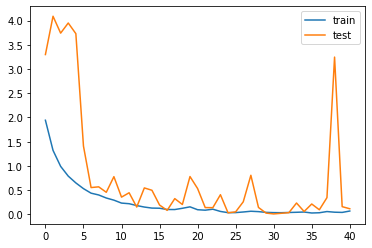

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

52/52 [==============================] - 6s 108ms/step - loss: 0.1292 - accuracy: 0.9555
Test loss: 0.1291959583759308
Test accuracy: 0.9554753303527832


In [171]:
Ypredict=model.predict(X_test)
pred=[]
for i in range(len(y_test)):
  pred.append(np.argmax(Ypredict[i]))
y_actual=[]
for i in range(len(y_test)):
  y_actual.append(np.argmax(y_test[i]))


In [153]:
print(pred)

None


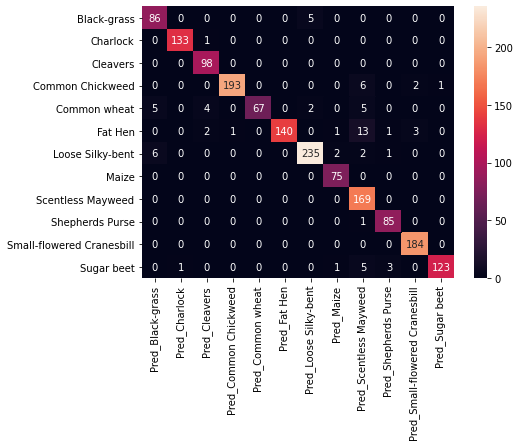

In [175]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=metrics.confusion_matrix(y_actual,pred)
log_cm=pd.DataFrame(cm,index = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
          'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'],columns=['Pred_Black-grass', 'Pred_Charlock', 'Pred_Cleavers', 'Pred_Common Chickweed', 'Pred_Common wheat', 'Pred_Fat Hen', 'Pred_Loose Silky-bent',
          'Pred_Maize', 'Pred_Scentless Mayweed', 'Pred_Shepherds Purse', 'Pred_Small-flowered Cranesbill', 'Pred_Sugar beet'])
plt.figure(figsize=(7,5))
sns.heatmap(log_cm,annot=True,fmt='g')

##  Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]


In [ ]:
classes

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

image of X_test[2]


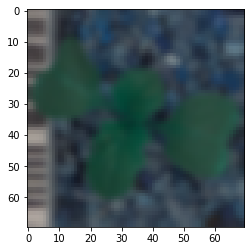

models predection of X_test [2]
Charlock


In [201]:
print('image of X_test[2]')
plt.imshow(X_test[2])
plt.show()
print('models predection of X_test [2]')
print(y_pred[2])

image of X_test[3]


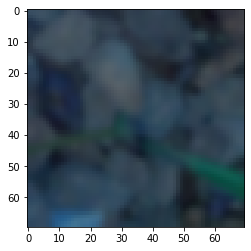

models predection of X_test[3]
Loose Silky-bent


In [202]:
 print('image of X_test[3]')
 plt.imshow(X_test[3])
plt.show()
 print('models predection of X_test[3]')
 print(y_pred[3])

image of X_test[33]


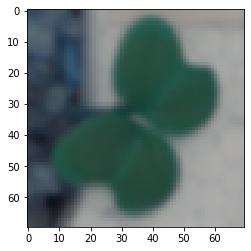

models predection of X_test[33]
Charlock


In [203]:
 print('image of X_test[33]')
 plt.imshow(X_test[33])
plt.show()
 print('models predection of X_test[33]')
 print(y_pred[33])

image of X_test[36]


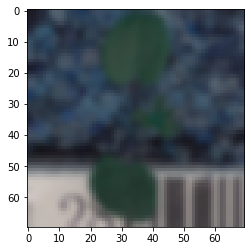

models predection of X_test[36]
Cleavers


In [204]:
 print('image of X_test[36]')
 plt.imshow(X_test[36])
plt.show()
 print('models predection of X_test[36]')
 print(y_pred[36])


image of X_test[59]


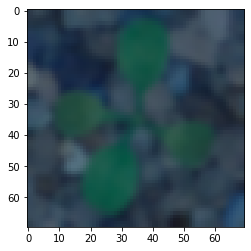

models predection of X_test[59]
Shepherds Purse


In [205]:
 print('image of X_test[59]')
 plt.imshow(X_test[59])
plt.show()
 print('models predection of X_test[59]')
 print(y_pred[59])

## Gethub Link
#https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-c4bantle/blob/master/Clayton_Bantle_Computer_Vision_Plant_Seedings.ipynb